In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

In [ ]:
# Check that TF 2.1.0 is in use
print(tf.__version__)

# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]

2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

3.   Name two ways to avoid this. [+2 answer, +2 answer]

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]

**2.1 Linear AE points for constructed model, no questions here.**

**2.2 Convolutional AE points for constructed model, no questions here.**

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

***Reminder: Achieve better than 75 anomalies***

In [ ]:
#Import dataset and normalize to [0,1]
mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
#Normalize
data_train =
data_test =
#Reshape
data_train = data_train.reshape(#######)
data_test = data_test.reshape(#######)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [1]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    
    #### Fill in Model ####
    
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

NameError: name 'model' is not defined

In [ ]:
# Information contained in history dict.
print(history_overfit.history.keys())

In [ ]:
#Plot accuracy vs epoch
plt.subplot(121)

#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)

#### Fill in plot ####


## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). What do you observe for (2)?.

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    
    #### Fill in model ####
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='#######', optimizer='#######', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

In [ ]:
#Plot train/validation loss vs epoch

#### Fill in plot #####

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Train for 150 epochs**

In [ ]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(##########)
data_test_reshape_fcae = data_test.reshape(##########)

In [ ]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    # Encoder
    
    #### Fill in the model ####
    
    # Decoder
    
    #### Fill in the model ####
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(loss='#######', optimizer='#######')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

In [ ]:
#Plot train/validation loss vs epoch

#### Fill in the plot ####

In [ ]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**All experiments with dropout set at 30%. Train for 200 epochs**

In [ ]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape(#############)
data_test_reshape_cae = data_test.reshape(#############)

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    

    #Encoder
    
    #### Fill in model ####

    #Decoder
    
    #### Fill in model ####
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss='########', optimizer='########')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=150, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

In [ ]:
#Plot train/validation loss vs epoch


In [ ]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

At this point you have enough starter code to 
Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [3]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

#### Example spectrograms

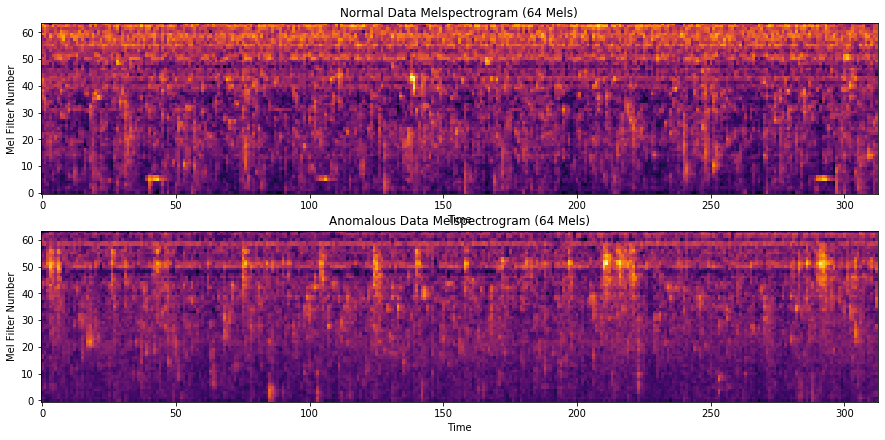

In [2]:
#### Load melspectrograms
ex_norm  = np.load('./data/ex_normalspec.npy')
ex_anom = np.load('./data/ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

#### General template, up to this point, for constructing your deep learning model 
1. Set up the data (reshape, scale, etc...
2. Initialize a loss function
3. Compile a model
4. Train a model

In [ ]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code
autoencoderBASE = tf.keras.models.Sequential([
   #### Fill in your model #####
])

In [7]:
# Load data
x_train = np.load('./data/training_data.npy')
test = np.load('./data/test_data.npy')

In [ ]:
# Plot loss versus epoch.

In [ ]:
######### This code should remain untouched as much as possible,
#### except where your variable names for loss function or data set are needed.
#### This code feeds your data through the trained network to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
#### lossFunction <- Your loss function's name or use this one. Your choice of loss function.
##############################################################################################
norm_list = []
dataset = (tf.data.Dataset.from_tensor_slices(#### your code... training or train/valid if used #####))
for i, instance in dataset.enumerate():
    ae_predictions = autoencoderBASE(instance).numpy()
    norm_list.append(lossFunction(instance, ae_predictions).numpy())
# Feed the anomaly data through to get its error
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(#### test data #####))
for i, instance in anomset.enumerate():
    ae_predictions = autoencoderBASE(instance).numpy()
    anom_list.append(lossFunction(instance, ae_predictions).numpy())
    
normal_data_ERRORs = np.array(norm_list)
abnormal_data_ERRORs = np.array(anom_list)
######################### Code for presenting true positives to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_ERRORs.mean()
std = normal_data_ERRORs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Error Histogram\'s')
plt.hist(normal_data_ERRORs, bins=50, alpha=0.5)
plt.hist(abnormal_data_ERRORs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('Error')
plt.ylabel('Number of instances')
plt.show()

In [ ]:
tp_count = np.sum(abnormal_data_ERRORs >= upperbound) +\
           np.sum(abnormal_data_ERRORs <= lowerbound)      
fn_count = anomaly_data.shape[0] - tp_count
fp_count = np.sum(normal_data_ERRORs >= upperbound)+\
           np.sum(normal_data_ERRORs <= lowerbound)        
tn_count = 1000 - fp_count

print(f'TP {tp_count} \t FP {fp_count}')
print(f'FN {fn_count} \t TN {tn_count}')